In [14]:
import pandas as pd
import librosa
import numpy as np
import tqdm
import matplotlib as mpl
import matplotlib.pyplot as plt; plt.style.use('/home/hugo/Thèse/styles.mplstyle')

import sys; sys.path.insert(0, '..')
from src.features import *

In [15]:
# Params
SR          = 10000
FRAME_SIZE  = 2048
HOP_SIZE    = FRAME_SIZE
N_COEFF     = FRAME_SIZE//2+1
PLAYERS = [3,4,5,6,7,8,11,12,14,16,17,18,19,21,22,24]

In [16]:
# Data
df = pd.read_pickle('../data/processed/dataset_bilbao.pkl')
df = df[df['type'] == 'scale']
df = df[df['violin'].isin(PLAYERS)]

y, _ = librosa.load(df['file'].iloc[0], sr=SR)

In [222]:
# Feature
y = y.astype(np.float64)
n_mels = 128*2
n_mfcc = np.linspace(30, 128, 3).astype(int)

f, ltas = scipy.signal.welch(y, fs=SR, nperseg=FRAME_SIZE, average='median', scaling='spectrum')
ltas = ltas[:, np.newaxis]
S = ltas
# S = librosa.feature.melspectrogram(S=ltas, sr=SR, n_mels=n_mels)
# f = librosa.mel_frequencies(n_mels=n_mels)
S = 10 * np.log10(S)

envelopes = []
for n in n_mfcc:
    mfcc = scipy.fftpack.dct(S, axis=-2, type=2, norm='ortho')
    mfcc[n:] = 0
    Sm = scipy.fftpack.idct(mfcc, axis=-2, type=2, norm='ortho')
    # envelopes.append(Sm)
    # Sml = np.power(10, Sm/10)
    # envelope = librosa.feature.inverse.mel_to_stft(Sml, sr=SR, power=1.0)
    envelopes.append(Sm)

envelopes = np.concatenate(envelopes, axis=1)
# ltas = 10 * np.log10(ltas)
# envelopes = 10 * np.log10(envelopes + 1e-10)

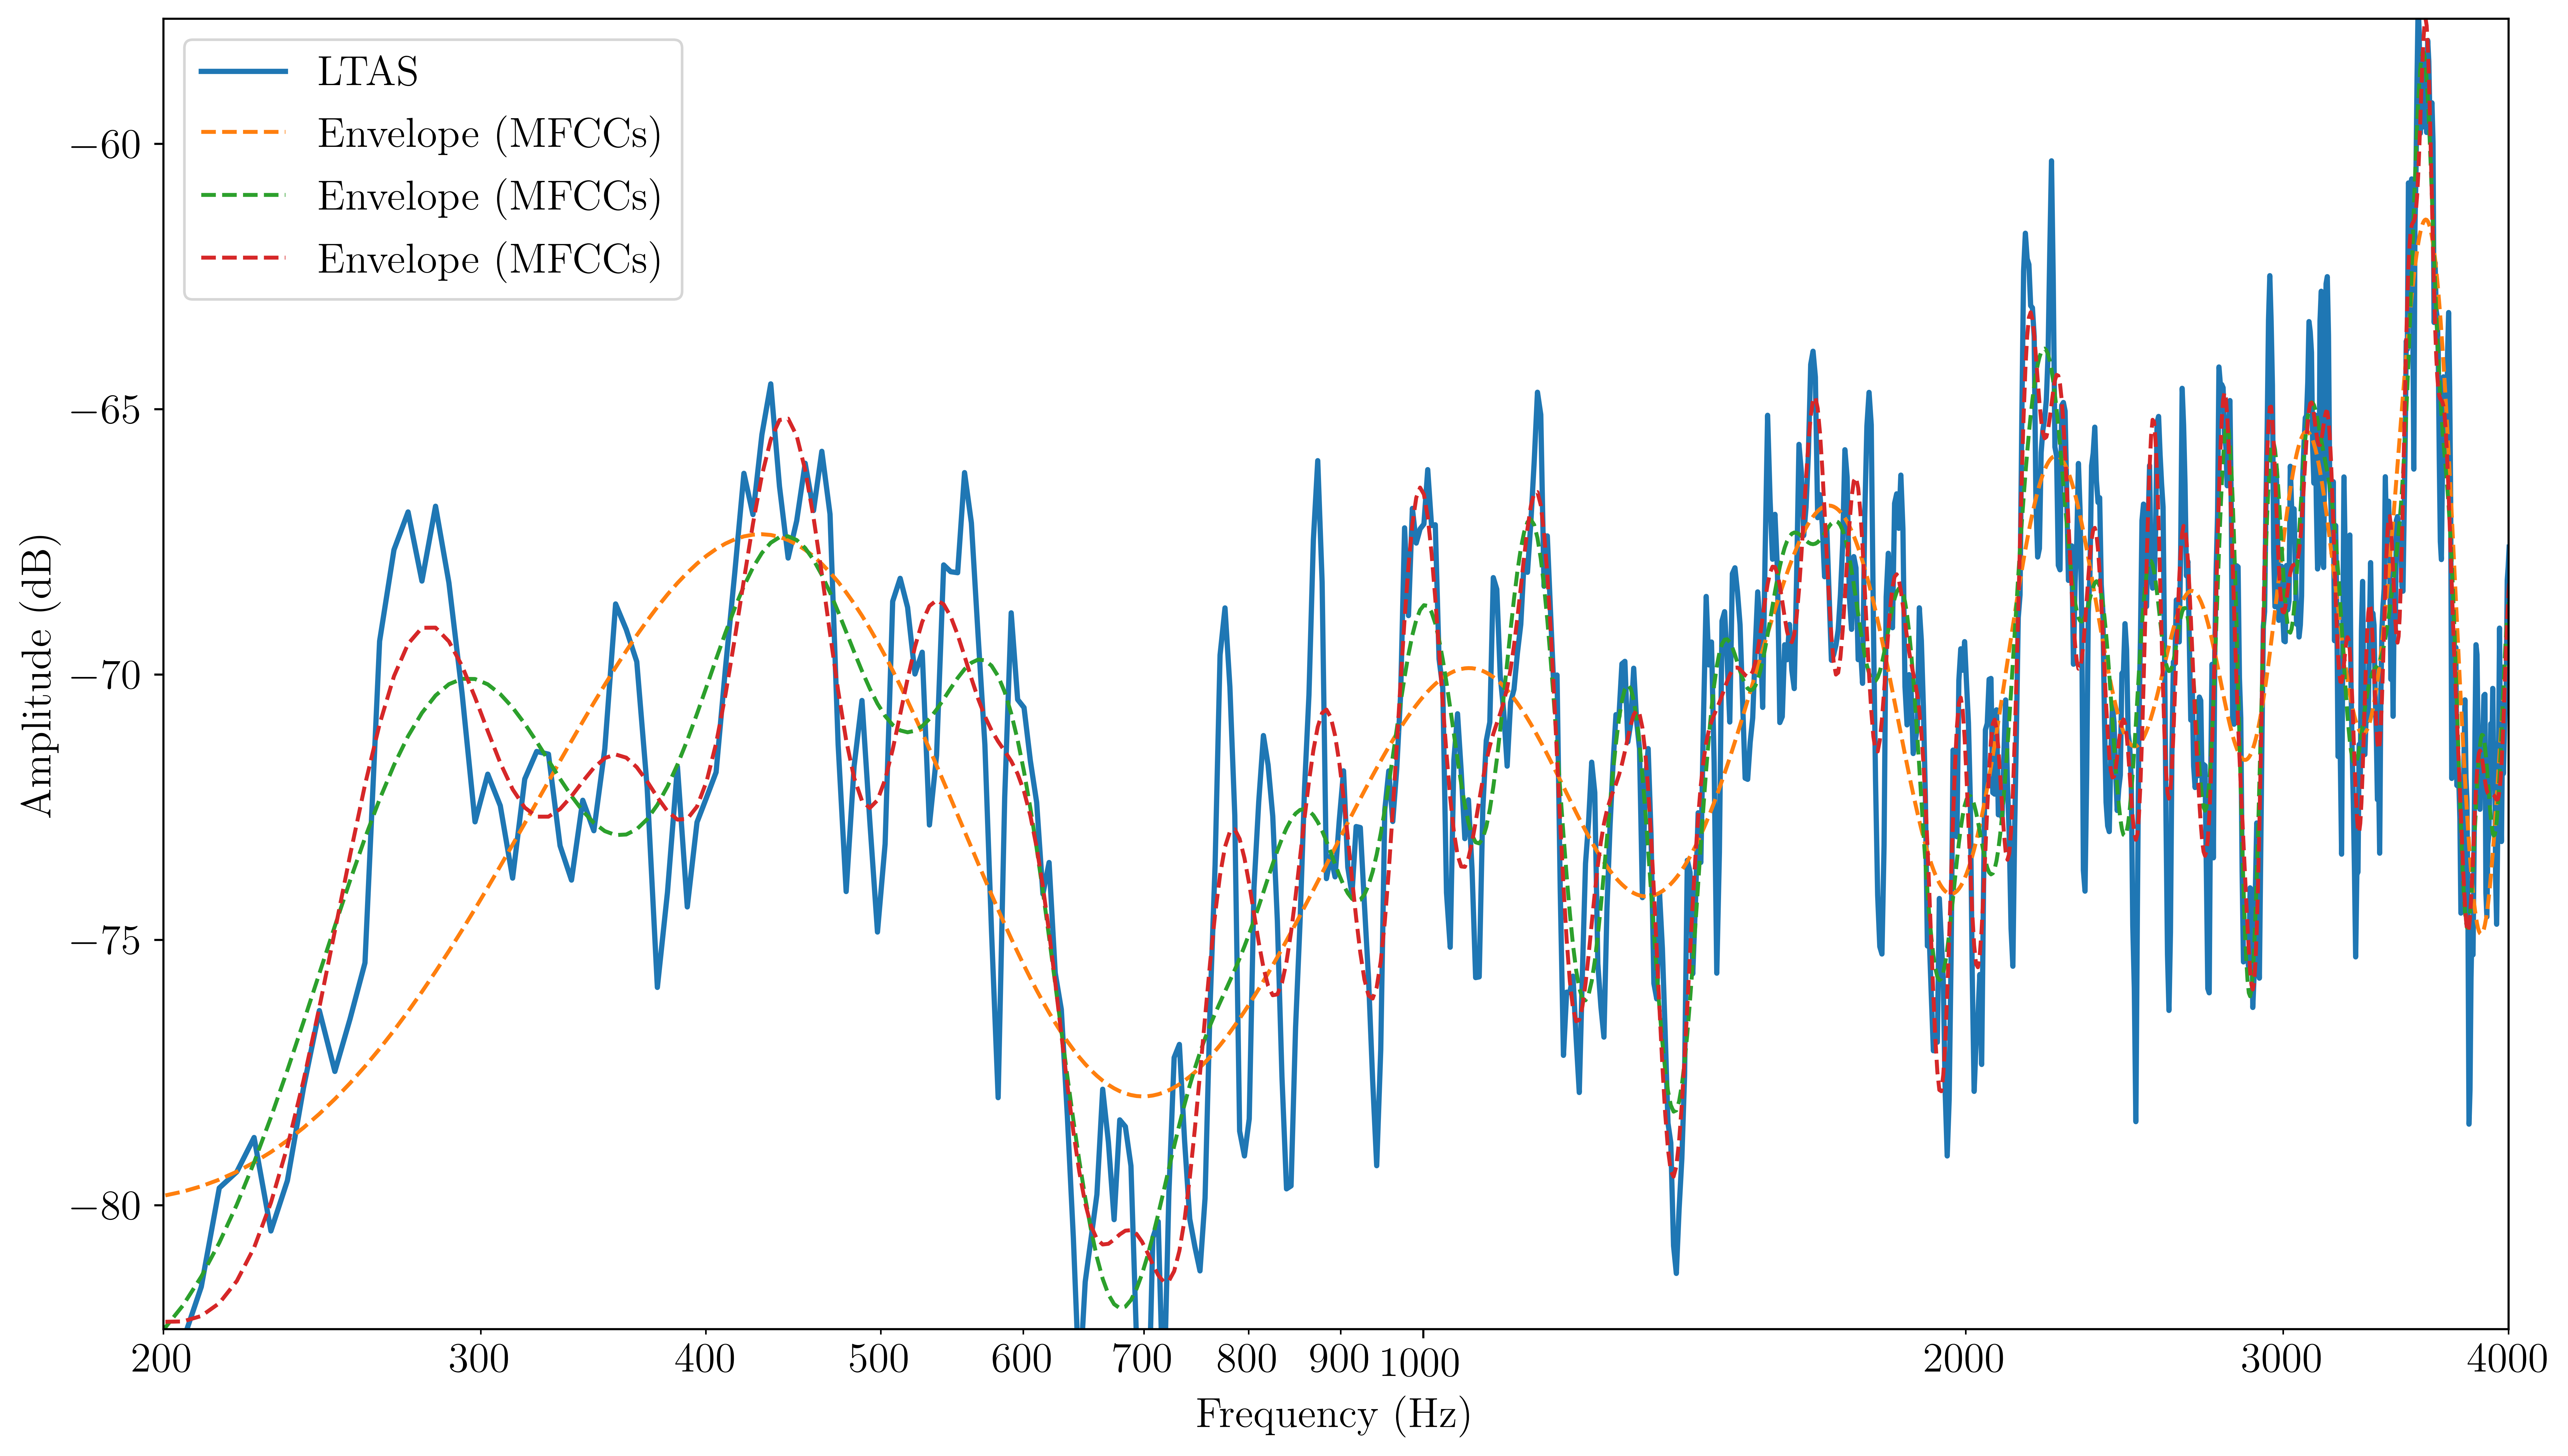

In [223]:
# Plot
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(f, S, label='LTAS', linewidth=2)
ax.plot(f, envelopes, label='Envelope (MFCCs)', linestyle='dashed')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Amplitude (dB)')
ax.set_xscale('log')
ax.set_xlim([200, 4000])
ax.legend()

lims = ax.get_xlim()
i = np.where( (f > lims[0]) & (f < lims[1]) )[0]
ax.set_ylim( envelopes[i].min(), envelopes[i].max() ) 

ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.xaxis.set_minor_formatter(mpl.ticker.ScalarFormatter())
ax.ticklabel_format(style='plain',axis='x',useOffset=False)


plt.savefig('../reports/figures/mfcc.png', bbox_inches='tight', dpi=300)
plt.show()